In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
#create an engine that can talk to the database
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)
result = session.query(Measurement).all()


/Users/seve/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


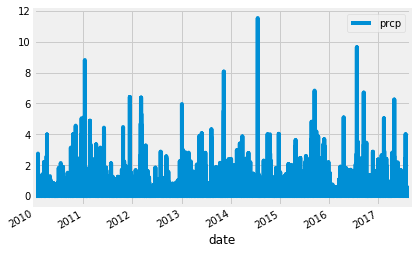

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
rain = session.query(Measurement.date, Measurement.prcp).all()

# Load the data from the query into a dataframe

df = pd.DataFrame(rain)
df.head()

# drop missing observations

df_no_missing = df.dropna()

df_no_missing.head()

# prepare dat for plotting
# Convert df['date'] from string to datetime
# Set df['date'] as the index and delete the column
df_no_missing['date'] = pd.to_datetime(df_no_missing['date'])
df_no_missing.index = df_no_missing['date']
del df_no_missing['date']

# a scatter plot comparing date and prcp
df_no_missing.plot()



In [26]:
# To Calculate the date 1 year ago from the last data point in the database
# write a query that gets the last date entry (after date.desc) in the data table
last_date_entry = session.query(Measurement.date).order_by(Measurement.date.desc()).first()

print(last_date)#prints the following date 2017, 8, 23

# we will use pandas.Series.dt.date to perform basic date calculations to 
# get the date 1 year ago from the last data point in the database
one_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

print(one_year_ago) #prints the following date 2016-08-23


('2017-08-23',)
2016-08-23


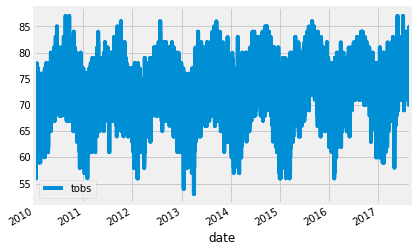

In [29]:
# Perform a query to retrieve the data and precipitation scores

date_prec_score = session.query(Measurement.date, Measurement.tobs).all()

# Load the data from the query into a dataframe

df_date_prec_score = pd.DataFrame(date_prec_score)
df_date_prec_score.head()


# prepare data for plotting
#Convert df['date'] from string to datetime
# Set df['date'] as the index and delete the column

df_date_prec_score['date'] = pd.to_datetime(df_date_prec_score['date'])
df_date_prec_score.index = df_date_prec_score['date']
del df_date_prec_score['date']

# Sort the dataframe by date
df_date_prec_score.sort_values(by='date') 

# a scatter plot comparing date and prcp
df_date_prec_score.plot()


In [33]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_no_missing.describe()

,prcp
count,18103.000000
mean,0.160644
std,0.468746
min,0.000000
25%,0.000000
50%,0.010000
75%,0.110000
max,11.530000


![precipitation](Images/precipitation.png)

![describe](Images/describe.png)


In [40]:
# Design a query to show how many stations are available in this dataset?
station = session.query(Measurement.station).all()

# Load the data from the query into a dataframe

station_df = pd.DataFrame(station)
station_df.head()

# count unique sations
# bonus: if we care about total count non-null values- station_df['station'].count()
station_df['station'].nunique()

9

In [ ]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.


In [ ]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?


In [ ]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


![precipitation](Images/station-histogram.png)

In [ ]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

In [ ]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.


In [ ]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


In [ ]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [ ]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

In [ ]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [ ]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [ ]:
# Plot the daily normals as an area plot with `stacked=False`
